In [242]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime
import matplotlib.pyplot as plt

In [243]:
df = pd.read_table("automobile.txt", sep = ",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [244]:
# Drop 'symboling', num-of-doors', 'height', 'length', 'width', 'engine-location', 'fuel-type' and 'fuel-system' as they will not be 
# used in this analysis.
df.drop('symboling',axis=1,inplace=True)
df.drop('num-of-doors',axis=1,inplace=True)
df.drop('height',axis=1,inplace=True)
df.drop('length',axis=1,inplace=True)
df.drop('width',axis=1,inplace=True)
df.drop('engine-location',axis=1,inplace=True)
df.drop('fuel-type',axis=1,inplace=True)
df.drop('fuel-system',axis=1,inplace=True)

# Drop 'normalized-losses' as the data has been excluded for several rows
df.drop('normalized-losses',axis=1,inplace=True)

df.head(15)


,make,aspiration,body-style,drive-wheels,wheel-base,curb-weight,engine-type,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,3.40,8.0,115,5500,18,22,17450
5,audi,std,sedan,fwd,99.8,2507,ohc,five,136,3.19,3.40,8.5,110,5500,19,25,15250
6,audi,std,sedan,fwd,105.8,2844,ohc,five,136,3.19,3.40,8.5,110,5500,19,25,17710
7,audi,std,wagon,fwd,105.8,2954,ohc,five,136,3.19,3.40,8.5,110,5500,19,25,18920
8,audi,turbo,sedan,fwd,105.8,3086,ohc,five,131,3.13,3.40,8.3,140,5500,17,20,23875
9,audi,turbo,hatchback,4wd,99.5,3053,ohc,five,131,3.13,3.40,7.0,160,5500,16,22,?


In [245]:
# Remove any duplicate rows.
df.drop_duplicates()

,make,aspiration,body-style,drive-wheels,wheel-base,curb-weight,engine-type,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,std,sedan,rwd,109.1,2952,ohc,four,141,3.78,3.15,9.5,114,5400,23,28,16845
201,volvo,turbo,sedan,rwd,109.1,3049,ohc,four,141,3.78,3.15,8.7,160,5300,19,25,19045
202,volvo,std,sedan,rwd,109.1,3012,ohcv,six,173,3.58,2.87,8.8,134,5500,18,23,21485
203,volvo,turbo,sedan,rwd,109.1,3217,ohc,six,145,3.01,3.40,23.0,106,4800,26,27,22470


In [246]:
# Identify any missing values
missing_values_count=df.isnull().sum()
missing_values_count[:]

make                 0
aspiration           0
body-style           0
drive-wheels         0
wheel-base           0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [247]:
# Make certain columns numeric instead of objects
df["bore"] = pd.to_numeric(df["bore"],errors='coerce')
df["stroke"] = pd.to_numeric(df["stroke"],errors='coerce')
df["horsepower"] = pd.to_numeric(df["horsepower"],errors='coerce')
df["peak-rpm"] = pd.to_numeric(df["peak-rpm"],errors='coerce')
df["price"] = pd.to_numeric(df["price"],errors='coerce')

Text(0.5, 0, 'Body Style')

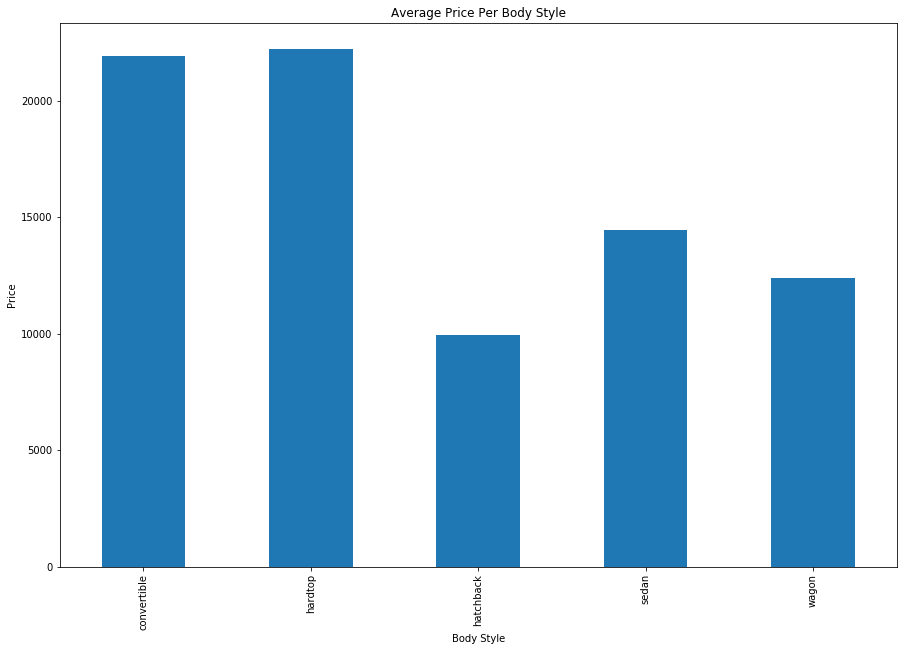

In [248]:
# Plot the average price of different body styles on a bar graph
body_styles_average=df.groupby('body-style')['price'].mean()
body_styles = body_styles_average.plot(kind='bar',stacked=True, title='Average Price Per Body Style',figsize=(15,10))
body_styles.set_ylabel('Price')
body_styles.set_xlabel('Body Style')

# A hardtop is the most expensive on average, followed by a convertible.
# A hatchback is the least expensive body style on average.

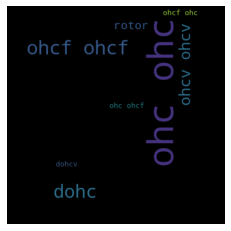

In [249]:
# Plot the most popular engine type on a word cloud
words = ' '
for val in df['engine-type']:
    val = str(val)
    tokens = val.split()
    for word in tokens:
        words = words + word + ' '
wordcloud = WordCloud(width=500,height=500,margin=10).generate(words)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.margins(x=0,y=0)
plt.show()

# OHC is the most popular engine type, followed by DOHC and OHCF.

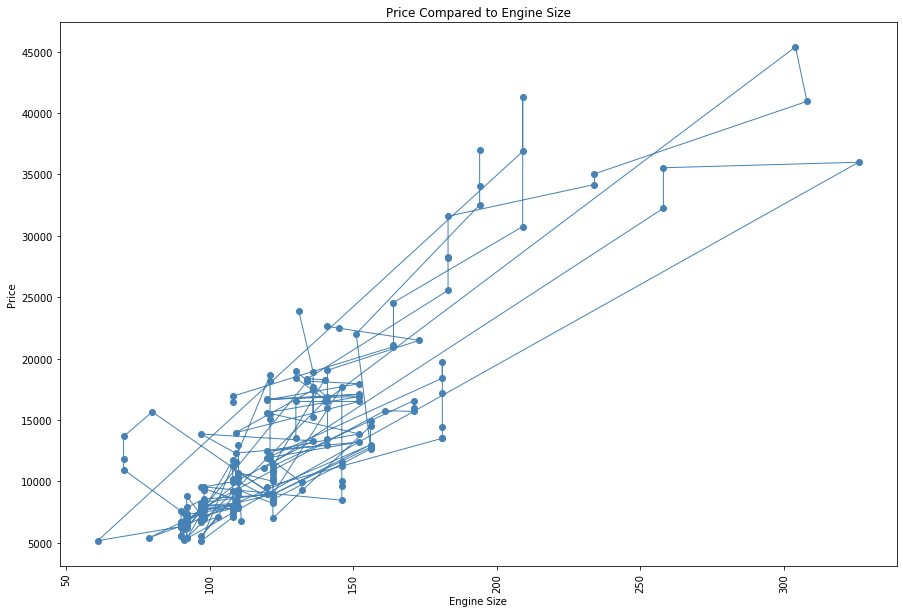

In [250]:
w = 4
h = 3
d = 70
plt.figure(figsize=(15,10))
x = df['engine-size']
y = df['price']
plt.xticks(rotation=90)
plt.title("Price Compared to Engine Size")
plt.xlabel("Engine Size")
plt.ylabel("Price")
engine_size_price=plt.plot(x,y, marker='o', color='steelblue', linewidth=1)

# Engine size does not necessarily affect the price of an automobile.

In [251]:
expensive_df=df.nlargest(10,['price']) # top 10 most expensive automobiles
expensive_df

,make,aspiration,body-style,drive-wheels,wheel-base,curb-weight,engine-type,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
74,mercedes-benz,std,hardtop,rwd,112.0,3715,ohcv,eight,304,3.80,3.35,8.0,184.0,4500.0,14,16,45400.0
16,bmw,std,sedan,rwd,103.5,3380,ohc,six,209,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
73,mercedes-benz,std,sedan,rwd,120.9,3900,ohcv,eight,308,3.80,3.35,8.0,184.0,4500.0,14,16,40960.0
128,porsche,std,convertible,rwd,89.5,2800,ohcf,six,194,3.74,2.90,9.5,207.0,5900.0,17,25,37028.0
17,bmw,std,sedan,rwd,110.0,3505,ohc,six,209,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0
49,jaguar,std,sedan,rwd,102.0,3950,ohcv,twelve,326,3.54,2.76,11.5,262.0,5000.0,13,17,36000.0
48,jaguar,std,sedan,rwd,113.0,4066,dohc,six,258,3.63,4.17,8.1,176.0,4750.0,15,19,35550.0
72,mercedes-benz,std,convertible,rwd,96.6,3685,ohcv,eight,234,3.46,3.10,8.3,155.0,4750.0,16,18,35056.0
71,mercedes-benz,std,sedan,rwd,115.6,3740,ohcv,eight,234,3.46,3.10,8.3,155.0,4750.0,16,18,34184.0
127,porsche,std,hardtop,rwd,89.5,2756,ohcf,six,194,3.74,2.90,9.5,207.0,5900.0,17,25,34028.0


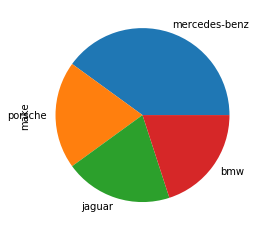

In [252]:
expensive_df['make'].value_counts()[:].plot(kind='pie')
plt.show()
# Mercedes-Benz occurs the most in the top 10 most expensive automobiles.

In [253]:
cheapest_df=df.nsmallest(10,['price']) # top 10 least expensive automobiles
cheapest_df

,make,aspiration,body-style,drive-wheels,wheel-base,curb-weight,engine-type,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
138,subaru,std,hatchback,fwd,93.7,2050,ohcf,four,97,3.62,2.36,9.00,69.0,4900.0,31,36,5118.0
18,chevrolet,std,hatchback,fwd,88.4,1488,l,three,61,2.91,3.03,9.50,48.0,5100.0,47,53,5151.0
50,mazda,std,hatchback,fwd,93.1,1890,ohc,four,91,3.03,3.15,9.00,68.0,5000.0,30,31,5195.0
150,toyota,std,hatchback,fwd,95.7,1985,ohc,four,92,3.05,3.03,9.00,62.0,4800.0,35,39,5348.0
76,mitsubishi,std,hatchback,fwd,93.7,1918,ohc,four,92,2.97,3.23,9.40,68.0,5500.0,37,41,5389.0
32,honda,std,hatchback,fwd,93.7,1837,ohc,four,79,2.91,3.07,10.10,60.0,5500.0,38,42,5399.0
89,nissan,std,sedan,fwd,94.5,1889,ohc,four,97,3.15,3.29,9.40,69.0,5200.0,31,37,5499.0
21,dodge,std,hatchback,fwd,93.7,1876,ohc,four,90,2.97,3.23,9.41,68.0,5500.0,37,41,5572.0
118,plymouth,std,hatchback,fwd,93.7,1918,ohc,four,90,2.97,3.23,9.40,68.0,5500.0,37,41,5572.0
51,mazda,std,hatchback,fwd,93.1,1900,ohc,four,91,3.03,3.15,9.00,68.0,5000.0,31,38,6095.0


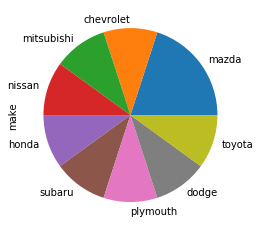

In [254]:
cheapest_df['make'].value_counts()[:].plot(kind='pie')
plt.show()
# Mazda occurs the most in the top 10 cheapest automobile makes